## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [ ]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [132]:
#Better
!pip install requests BeautifulSoup4 fire

In [133]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [134]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None

def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)

def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))

def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [135]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa', tag='h2') 
res
df = pd.DataFrame(res)
df.columns= ['Twitter Influencers']
df.head(10)

,Twitter Influencers
0,100. Jeffrey Gettleman (@gettleman)
1,99. Africa24 Media (@a24media)
2,98. Scapegoat (@andiMakinana)
3,97. Africa Check (@AfricaCheck)
4,96. James Copnall (@JamesCopnall)
5,95. Online Africa (@oafrica)
6,94. Patrick Ngowi (@PatrickNgowi)
7,93. DOS African Affairs (@StateAfrica)
8,92. MoadowAJE (@Moadow)
9,91. Brendan Boyle (@BrendanSAfrica)


In [141]:
# extract the first ten twitter handles 
df = pd.DataFrame(res)
df.tail(15)

,0
90,10. Computicket (@Computicket)
91,9. loyiso gola (@loyisogola)
92,8. 5FM (@5FM)
93,7. mailandguardian (@mailandguardian)
94,6. Helen Zille (@helenzille)
95,5. Julius Sello Malema (@Julius_S_Malema)
96,4. News24 (@News24)
97,3. Jacob G. Zuma (@SAPresident)
98,2. Gareth Cliff (@GarethCliff)
99,1. Trevor Noah (@Trevornoah)


In [142]:
# cleaning the data
df1 = df[0].str.split('(', expand=True)
df1.tail(15)
df2 = df1[1].str.split(')', expand=True)
df2.tail(15)
df3 = df2.dropna(axis=0, how='any')
df3.tail(10) 
df4 = df3.sort_index(ascending=0)
df4.head(10)
df5 = df4[0].replace('@','', regex=True)
df5.head(10)

99         Trevornoah
98        GarethCliff
97        SAPresident
96             News24
95    Julius_S_Malema
94         helenzille
93    mailandguardian
92                5FM
91         loyisogola
90        Computicket
Name: 0, dtype: object

In [10]:
df5.to_csv("Twitter_influence.csv")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [147]:
# Fetching twitter data
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import re
import string

tag=[]
tweet_id= tweet.id
max_id = None

# assign the access token, access token secret, consumer key and consumer secret
consumer_key = 'EmQbpXWpzQSYLb8eI8Gc4sEk2'
consumer_secret = 'tL5eofcBlQFicqGrTu1LpYcuEKVC49bcduwYr06xUtgw2rKp82'
access_token = '1283764477368860678-mfX2LwpfiKMmUDGIQ8tvEhJ7tDxofj'
access_token_secret = 'bvqw6m2OQzROZv2KCLGHBqQXWnoC6R1J6MuMjdH8I3r3f'
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
# calling the api
api = tweepy.API(auth)

for target in df5:
    try:
       print("Getting data for " + target)
       item = api.get_user(target)
       followers = 0
       follow = 0
       print("name: " + item.name)
       print("screen_name: " + item.screen_name)
       print("description: " + item.description)
       print("Created at: "+str(item.created_at))
       print("Lists user has been added to: "+str(item.listed_count))
       print("statuses_count: " + str(item.statuses_count))
       print("friends_count: " + str(item.friends_count))
       print("followers_count: " + str(item.followers_count))
       location = item.location
       if location == "": 
           print("The user has not mentioned their location.") 
       else: 
            print("The location of the user is : " + location) 
       followers += item.followers_count
       follow += item.friends_count
       reach_score = followers - follow
       print('The reach score is: ', reach_score)
       # Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
       tweets = api.user_timeline(target, count=5) 
       counter = 0
       favcounter= 0
       # foreach through all tweets pulled
       for tweet in tweets:
      # printing the text stored inside the tweet object
        print (tweet.text)
        # fetching the retweet_count attribute 
        retweet_count = tweet.retweet_count  
        print("The number of time the tweet has been retweeted is : " + str(retweet_count)) 
        # fetching the favorite_count attribute 
        favorite_count = tweet.favorite_count 
        print("The number of time the status has been favourited is : " + str(favorite_count))
        counter += retweet_count
        favcounter += favorite_count
        popularity_score = counter + favcounter
        print('The popularity score is: ',popularity_score)
#         collect hashtags from each tweet
        tag = tweet.entities['hashtags']
        print(tag)
       
    except tweepy.TweepError :
        pass

Getting data for Trevornoah
name: Trevor Noah
screen_name: Trevornoah
description: Comedian from South Africa. I was in the crowd when Rafiki held Simba over the edge of the cliff, like an African Michael Jackson.
Created at: 2009-06-11 07:03:48
Lists user has been added to: 11085
statuses_count: 11186
friends_count: 325
followers_count: 10808869
The location of the user is : New York, NY
The reach score is:  10808544
Oh my God! 😭 “Trepanoah” What an adorable little soul. https://t.co/7iZCkKAOU3
The number of time the tweet has been retweeted is : 3005
The number of time the status has been favourited is : 45250
The popularity score is:  48255
[]
Actual video footage of me starting off the week! https://t.co/2pt2yh47ry
The number of time the tweet has been retweeted is : 2768
The number of time the status has been favourited is : 21137
The popularity score is:  72160
[]
RT @KingBach: https://t.co/Sj2sVP7Gdt
The number of time the tweet has been retweeted is : 93162
The number of time t

In [148]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [149]:
import re
res = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})
res

findaing all of {'class_': 'wp-block-embed__wrapper'}


['\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

findaing all of {'class_': 'wp-block-embed__wrapper'}


['\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

In [150]:
str_cells2=str(res)
cleantext=BeautifulSoup(str_cells2).get_text()
data=[]
for item in cleantext.split("20,"):
    clean=re.compile(r'@(\w*)')
    clean2=re.search(clean,item)
    if clean2 is not None:
        data.append({'value': clean2.group(0) })
    
df=pd.DataFrame(data)
df.columns = ["African leaders"]
df.to_csv('African_leaders.csv')
df.head(36)


,African leaders
0,@EswatiniGovern1
1,@MalawiGovt
2,@hagegeingob
3,@FinanceSC
4,@PresidencyZA
5,@Dora_Siliya
6,@edmnangagwa
7,@MinSantedj
8,@hawelti
9,@StateHouseKenya


In [151]:
# df1 = df.sort_index(ascending=0)
df.head(10)
df1 = df.replace('@','', regex=True)
df.columns = ["African leaders"]
df1.head(10)

,African leaders
0,EswatiniGovern1
1,MalawiGovt
2,hagegeingob
3,FinanceSC
4,PresidencyZA
5,Dora_Siliya
6,edmnangagwa
7,MinSantedj
8,hawelti
9,StateHouseKenya


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
import tweepy
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys

consumer_key = 'EmQbpXWpzQSYLb8eI8Gc4sEk2'
consumer_secret = 'tL5eofcBlQFicqGrTu1LpYcuEKVC49bcduwYr06xUtgw2rKp82'
access_token = '1283764477368860678-mfX2LwpfiKMmUDGIQ8tvEhJ7tDxofj'
access_token_secret = 'bvqw6m2OQzROZv2KCLGHBqQXWnoC6R1J6MuMjdH8I3r3f'
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)
# calling the api
api = tweepy.API(auth)
    

In [171]:
for leader in df1:
    try:
       print("Getting data for " + leader)
#        boss = api.get_user(leader)
#        follower = 0
#        following = 0
#        print("name: " + str(boss.name))
#        print("screen_name: " + str(boss.screen_name))
#        print("description: " + str(boss.description))
#        print("Created at: "+str(boss.created_at))
#        print("Lists user has been added to: "+str(boss.listed_count))
#        print("statuses_count: " + str(boss.statuses_count))
#        print("friends_count: " + str(boss.friends_count))
#        print("followers_count: " + str(boss.followers_count))
#        location = boss.location
#        if location == "": 
#            print("The user has not mentioned their location.") 
#        else: 
#             print("The location of the user is : " + location) 
#        followers += item.followers_count
#        follow += item.friends_count
#        reach_score = followers - follow
#        print('The reach score is: ', reach_score)
       status = api.home_timeline(screen_name=leader,count=5)
       tweet_list = [tweet for tweet in status]
       counters = 0
       favcounters= 0
       for tweet in tweet_list:
            followers
            retweets = tweet.retweet_count
            likes = tweet.favorite_count
            counters += retweets
            favcounters += likes
            print(tweet.text)
            print('number of retweets ' , retweets)
            print('number of likes ' , likes)
            popularity_score = counters + favcounters   
            print('POPULARITY SCORE',popularity_score)
            vtag = tweet.entities['hashtags']
            print(vtag)
        
    except tweepy.TweepError :
         pass

Getting data for African leaders
That sums up our season. we’re miles off.
number of retweets  8187
number of likes  97261
POPULARITY SCORE 105448
[]
I've just done a soundcheck ahead of tonight's show, and even more excited now! I can't wait to perform again for y… https://t.co/b8G1M9Iuaa
number of retweets  13807
number of likes  121045
POPULARITY SCORE 240300
[]
RT @BBCR1: Happy #WorldEmojiDay! Can you guess the song titles below?

1. ✨⬆️
2. 💍💍💍💍💍💍💍
3. 🐢👐
4. 🕺🐒
5. ⛔⌛💀
number of retweets  2102
number of likes  0
POPULARITY SCORE 242402
[{'text': 'WorldEmojiDay', 'indices': [17, 31]}]
24 hours until #TheLPShow! My team and I have decided to put a few more tickets on sale, so get them NOW whilst you… https://t.co/2tLarLavoP
number of retweets  10821
number of likes  107529
POPULARITY SCORE 360752
[{'text': 'TheLPShow', 'indices': [15, 25]}]
Auckland! Gutted that we couldn’t find a way to make the show work but hoping to see you all in the future x
number of retweets  20039
number of li

In [179]:
list = ['africa', 'COVID19', 'StayHome', 'covid','coronavirus']
hashtag_grouping = {}
for sub in list:
    hashtag_grouping[sub] = []
    new_hashtag_grouping={}
    for key in hashtag_grouping.keys():
        new_hashtag_grouping[key] = str(hashtag_grouping[key])

df = pd.DataFrame({key: pd.Series(value) for key, value in hashtag_grouping.items()})
df

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


,africa,COVID19,StayHome,covid,coronavirus


In [187]:
df.index

RangeIndex(start=0, stop=0, step=1)

In [188]:
df.columns

Index(['africa', 'COVID19', 'StayHome', 'covid', 'coronavirus'], dtype='object')

IndexError: list index out of range

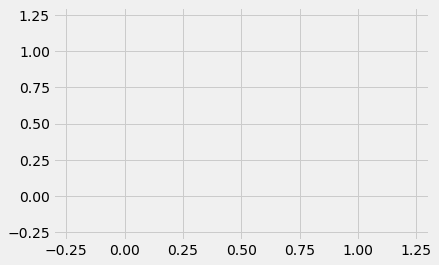

In [191]:

df.plot.bar()


<function matplotlib.pyplot.show(*args, **kw)>

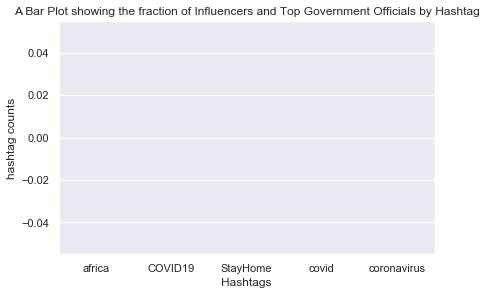

In [193]:
import seaborn as sns
sns.set()

x = list
y = [len(value) for key, value in hashtag_grouping.items()]
sns.barplot(x, y)
plt.title("A Bar Plot showing the fraction of Influencers and Top Government Officials by Hashtag")
plt.xlabel("Hashtags")
plt.ylabel('hashtag counts')
plt.show

## Web scrapping using bash script
If the web site has a quite simple HTML, you can easily use curl to perform the request and then extract the needed values using bash commands grep, cut , sed, ..

This tutorial is adapted from [this](https://medium.com/@LiliSousa/web-scraping-with-bash-690e4ee7f98d) medium article

In [186]:
%%bash 

# curl the page and save content to tmp_file
#url = "https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa"
#curl -X GET $url -o tmp_file


#!/bin/bash

# write headers to CSV file
echo "Name, twitter_id" >> extractData.csv
n="1"
while [ $n -lt 2 ]
do
  
  #get title
  title=$(cat tmp_file | grep "class=\"twitter-tweet\"" | cut -d ';' -f1 )
  echo $title
  #get author
  #twitter_id=$(cat tmp_file |grep -A1 "class=\"css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0\"" | tail -1)

  #echo "$title, $twitter_id" >> extractData.csv
  #echo "$title, $twitter_id"
    
  n=$[$n+1]

done

Couldn't find program: 'bash'
